<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook</p></tp>
            <tp><p style="font-size:150%;text-align:center">Arquitecturas de agentes</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---


## Objetivo <a class="anchor" id="inicio"></a>

En este notebook ejemplificaremos tres tipos de agente: dirigido por tabla, de respuesta simple y basado en objetivos. Usaremos el problema del laberinto para implementar los programa de agente para intentar salir del laberinto y mostraremos una manera de comparar sus desempeños.


[Ir al ejercicio 1](#ej1)

## Dependencias

Al iniciar el notebook o reiniciar el kerner se pueden cargar todas las dependencias de este notebook corriendo las siguientes celdas. Este también es el lugar para instalar las dependencias que podrían hacer falta.

**De Python:**

In [1]:
import numpy as np

**Del notebook:**

In [2]:
from agentes import Random, TableDriven, RuleBased, GoalBased
from ambientes import Laberinto
import utils

## Secciones

Desarrollaremos la explicación en las siguientes secciones:

1. [El ambiente del laberinto](#lab)
2. [Un agente dirigido por tabla](#agenteTD)
3. [Un agente de reflejo simple](#agenteSR)
4. [Pruebas de desempeño](#pruebas)
5. [Un agente basado en objetivos](#agenteOB)

## El ambiente del laberinto <a class="anchor" id="lab"></a>

([Volver al inicio](#inicio))

Imagine un agente dentro de un laberinto, el cual consiste de una rejilla de doce por doce casillas. El laberinto tiene solo una casilla que sirve de entrada y de salida, que es la casilla $(0,0)$. Aquí la primera coordenada es la posición en el ejer horizontal y la segunda en el vertical, con origen la esquina inferior izquierda. Esta casilla es la única forma de salir o de entrar al laberinto. Cada rejilla es o bien un pasadizo o bien un muro. El agente puede moverse una casilla en dirección vertical u horizontal (nunca diagonal) siempre y cuando la casilla a la que se mueve no sea un muro o el fin de la rejilla. El agente tiene a su disposición un mapa del laberinto y la localización en la que se encuentra. El problema consiste en, dada una posición dentro del laberinto, encontrar un camino que lo lleve hasta la salida.

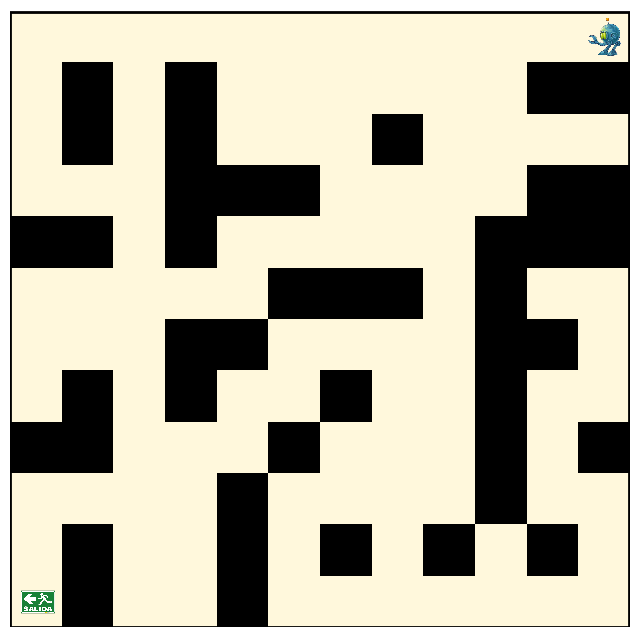

In [3]:
lab = Laberinto()
lab.render()

La percepción del agente consiste en una colección de sensores que se encienden cuando detectan un obstáculo, organizados de la siguiente manera:

`[sensor frontal, sensor izquierdo, sensor derecho, sensor trasero]`

Los estados del `Laberinto` los constituyen los valores de los sensores:

In [4]:
lab = Laberinto()
state = lab.reset()
print('El estado inicial es:')
print(f'[sensor frontal={state[0]}, sensor izquierdo={state[1]}, sensor derecho={state[2]}, sensor trasero={state[3]}]')

El estado inicial es:
[sensor frontal=False, sensor izquierdo=True, sensor derecho=True, sensor trasero=True]


Las acciones posibles del agente son:

* adelante: el agente avanza una casilla.
* voltearIzquierda: el agente gira 90º en contra de las manecillas del reloj.
* voltearDerecha: el agente gira 90º a favor de las manecillas del reloj.

Cada acción del agente tiene un efecto en el entorno, implementado mediante el método `step(action)` de la clase `Laberinto`. Este método recibe la acción del agente y devuelve un nuevo estado, una recompensa, y la información de si el entorno sigue activo. Este es el ciclo básico agente-entorno, ejemplificado en el siguiente diagrama:

<img src="./imagenes/agent_loop.png" width="400"/>

En el módulo `utils` tenemos una serie de clases que nos harán la vida más fácil a la hora de correr los agentes en el entorno. La clase que usaremos para correr un episodio se llama `Episode`. Veamos un ejemplo en donde el agente parte de la casilla $(11,11)$ y deambula aleatoriamente por el laberinto por 15 rondas:

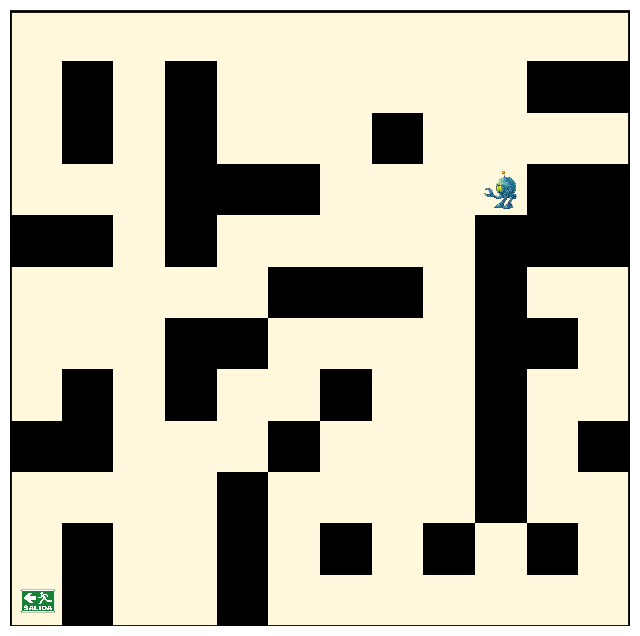

In [5]:
# Create environment
lab = Laberinto()
# Create agent
agent = Random()
# Create episode
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Random',\
        num_rounds=100)
# Visualize
episodio.renderize()

---

## Un agente dirigido por tabla <a class="anchor" id="agenteTD"></a>

([Volver al inicio](#inicio))

El tipo más sencillo de un programa de agente es cuando hacemos una asociación directa entre input y output, en este caso, entre percepción y acción. Esta asociación se puede realizar mediante una tabla. 

Definimos la siguiente tabla (que hasta ahora sólo está definida parcialmente), la cual vincula perceptos con acciones. La tabla implementa la idea de que si el agente percibe que el frente no está bloqueado y el flanco derecho está bloqueado, entonces avanza una casilla:

In [6]:
# (sensor frontal, sensor izquierdo, sensor derecho, sensor trasero)
tabla = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    (False, True, True, True):['adelante'],
    (False, True, True, False):['adelante'],
    (False, False, True, True):['adelante'],
    (False, False, True, False):['adelante'],
}

Observe que esta regla tan simple requiere ser expresada mediante cuatro filas de la tabla.

Observemos cómo trabaja el agente que implementa este programa:

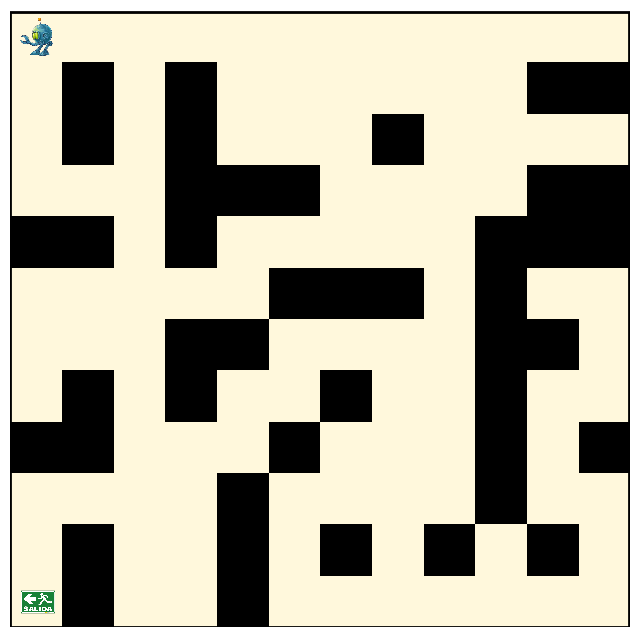

Exception: ¡Tabla incompleta! No contempla el estado [True, False, True, False]

In [7]:
# Create environment
lab = Laberinto()
# Create agent
agent = TableDriven()
agent.tabla = tabla
# Create episode
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Tabla',\
        num_rounds=15)
# Visualize
episodio.renderize()

El error `¡Tabla incompleta! No contempla el estado [True, False, True, False]` ocurre porque la tabla no tiene ninguna fila para el percepto `(True, False, True, False)` y entonces no puede determinar ninguna acción a tomar. ¡Observe que el agente no sabe qué acción tomar en ninguna situación cuando hay un muro enfrente! 

<a class="anchor" id="ej1"></a>**Ejercicio 1:** 

([Próximo ejercicio](#ej2))

El agente llega hasta que se topa con un muro y no sabe qué hacer. Extienda la tabla anterior para incluir las líneas que determinan que "si el frente y el flanco derecho están bloqueados y el flanco izquierdo no está bloqueado, voltear a la izquierda".

Visualice el funcionamiento del agente para comprobar su respuesta.

In [8]:
# (sensor frontal, sensor izquierdo, sensor derecho, sensor trasero)
tabla = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    (False, True, True, True):['adelante'],
    (False, True, True, False):['adelante'],
    (False, False, True, True):['adelante'],
    (False, False, True, False):['adelante'],
    # Si el frente está bloqueado y el flanco derecho está
    # bloqueado y el flanco izquierdo , gira a la izquierda
    (True, False, True, True):['voltearIzquierda'],
    (True, False, True, False):['voltearIzquierda'],
}

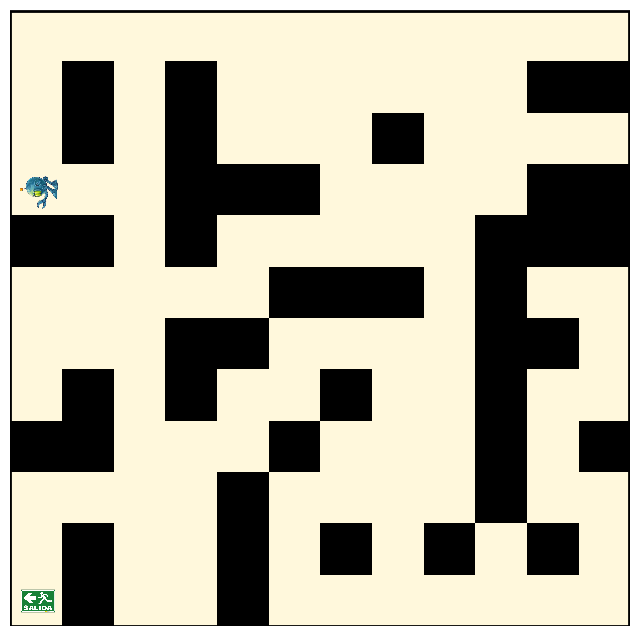

In [9]:
# Create environment
lab = Laberinto()
# Create agent
agent = TableDriven()
agent.tabla = tabla
# Create episode
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Tabla',\
        num_rounds=15)
# Visualize
episodio.renderize()

---

<a class="anchor" id="ej2"></a>**Ejercicio 2:** 

([Anterior ejercicio](#ej1)) ([Próximo ejercicio](#ej3))

En la tabla falta incluir instrucciones que digan que "si el flanco derecho no está bloqueado, voltear a la derecha y avanzar una casilla". Extienda la tabla del ejercicio 2 para incluir las líneas que implementan esta regla. Visualice el funcionamiento del agente comenzando desde la casilla $(11,11)$.

**Nota:** cambie el parámetro `num_rounds` del episodio a 70.

In [10]:
from itertools import product
estados=[(x,y,False,z) for x,y,z in product((True,False),repeat=3)]
for x in estados:
    st=str(x)+":['voltearDerecha','adelante'],"
    print(st)
            
        

(True, True, False, True):['voltearDerecha','adelante'],
(True, True, False, False):['voltearDerecha','adelante'],
(True, False, False, True):['voltearDerecha','adelante'],
(True, False, False, False):['voltearDerecha','adelante'],
(False, True, False, True):['voltearDerecha','adelante'],
(False, True, False, False):['voltearDerecha','adelante'],
(False, False, False, True):['voltearDerecha','adelante'],
(False, False, False, False):['voltearDerecha','adelante'],


In [11]:
# (sensor frontal, sensor izquierdo, sensor derecho, sensor trasero)
tabla = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    (False, True, True, True):['adelante'],
    (False, True, True, False):['adelante'],
    (False, False, True, True):['adelante'],
    (False, False, True, False):['adelante'],
    # Si el frente está bloqueado y el flanco derecho está
    # bloqueado y el flanco izquierdo , gira a la izquierda
    (True, False, True, True):['voltearIzquierda'],
    (True, False, True, False):['voltearIzquierda'],
    #si el flanco derecho no está bloqueado, voltear a la derecha y avanzar una casilla
    (True, True, False, True):['voltearDerecha','adelante'],
    (True, True, False, False):['voltearDerecha','adelante'],
    (True, False, False, True):['voltearDerecha','adelante'],
    (True, False, False, False):['voltearDerecha','adelante'],
    (False, True, False, True):['voltearDerecha','adelante'],
    (False, True, False, False):['voltearDerecha','adelante'],
    (False, False, False, True):['voltearDerecha','adelante'],
    (False, False, False, False):['voltearDerecha','adelante'],
}

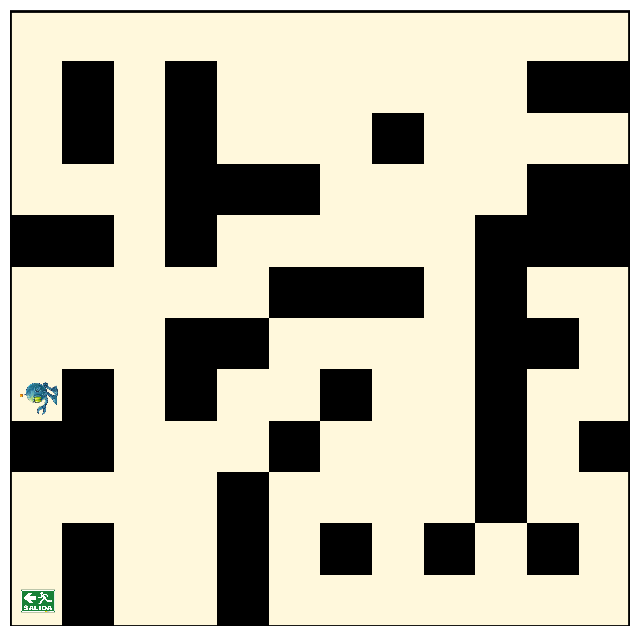

Exception: ¡Tabla incompleta! No contempla el estado [True, True, True, False]

In [12]:
# Create environment
lab = Laberinto()
# Create agent
agent = TableDriven()
agent.tabla = tabla
# Create episode
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Tabla',\
        num_rounds=70)
# Visualize
episodio.renderize()

---

<a class="anchor" id="ej3"></a>**Ejercicio 3:** 

([Anterior ejercicio](#ej2)) ([Próximo ejercicio](#ej4))

* ¿Qué pasa cuando el agente comienza en la casilla $(6,3)$? Describa el comportamiento del agente y explique si el programa de agente resulta adecuado o no para este caso.

* ¿Qué pasa cuando el agente comienza en la casilla $(7,3)$? Describa el comportamiento del agente y explique si el programa de agente resulta adecuado o no para este caso.

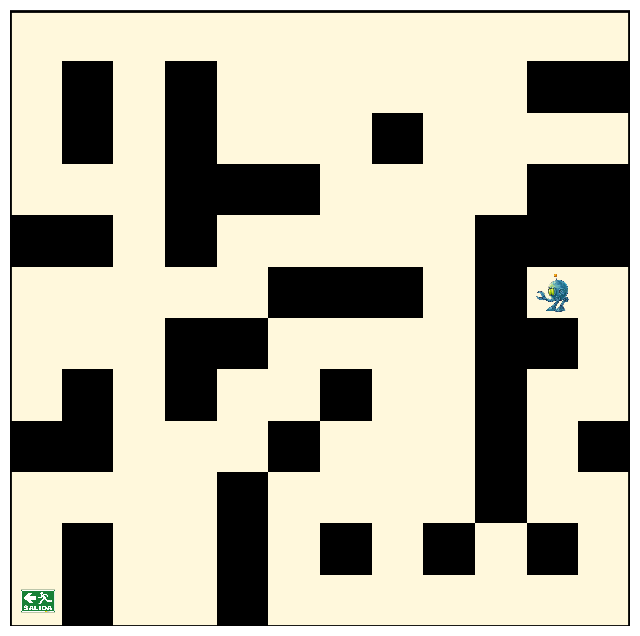

Exception: ¡Tabla incompleta! No contempla el estado [True, True, True, False]

In [13]:
# Create environment
lab = Laberinto(pos_inicial=(6,3))
# Create agent
agent = TableDriven()
agent.tabla = tabla
# Create episode
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Tabla',\
        num_rounds=70)
# Visualize
episodio.renderize()

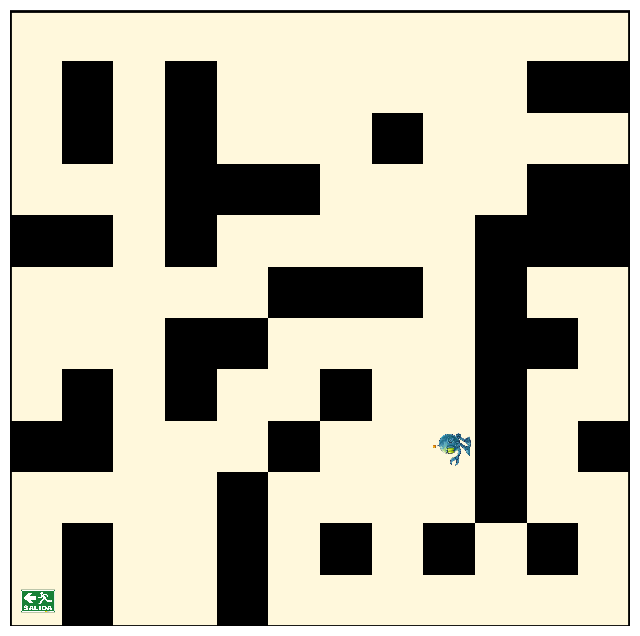

In [14]:
# Create environment
lab = Laberinto(pos_inicial=(7,3))
# Create agent
agent = TableDriven()
agent.tabla = tabla
# Create episode
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Tabla',\
        num_rounds=70)
# Visualize
episodio.renderize()

En ambos casos el robot se queda dando vueltas, esto muestra que la tabla de instruciones que se le proporciono no es suficiente para resolver cualquier punto inicial.

---

## Un agente de reflejo simple <a class="anchor" id="agenteSR"></a>

([Volver al inicio](#inicio))

El proceso de escribir una tabla es bastante dispendioso, pues hay que considerar una gran cantidad de combinaciones de valores para los sensores. Un tipo de agente de nivel un poco más elevado que resuelve esta situación son los agentes de reflejo simple. El programa de este tipo de agentes está basado en relgas de condición-acción, las cuales relacionan condiciones sobre los sensores y las acciones. Al considerar condiciones en lugar de combinaciones de valores, la escritura es más eficiente.

A continuación presentamos una posible implementación de un agente de reflejo simple para el problema del laberinto.

In [15]:
# state[0]  =>  sensor forntal
# state[1]  =>  sensor izquierdo
# state[2]  =>  sensor derecho
# state[3]  =>  sensor trasero
reglas = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    'not state[0] and state[2]': ['adelante'],
}

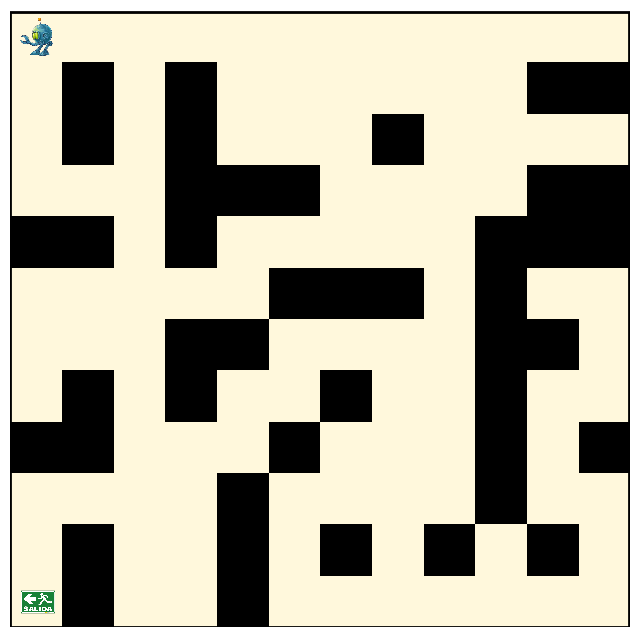

Exception: ¡Plan vacío! Revisar reglas en estado [True, False, True, False]

In [16]:
# Create environment
lab = Laberinto()
# Create agent
agent = RuleBased()
agent.reglas = reglas
# Create episode
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Reglas',\
        num_rounds=70)
# Visualize
episodio.renderize()

El error `¡Plan vacío! Revisar reglas en estado [True, False, True, False]` ocurre porque el programa aún no está equipado para dar una decisión cuando haya un muro enfrente.

<a class="anchor" id="ej4"></a>**Ejercicio 4:** 

([Anterior ejercicio](#ej3)) ([Próximo ejercicio](#ej5))

Extienda el programa de agente anterior para implementar las reglas condición-acción siguientes:

* Si el frente y el flanco derecho están bloqueados pero el flanco izquierdo no está bloqueado, voltear a la izquierda.
* Si el flanco derecho no está bloqueado, voltear a la derecha y avanzar una casilla.

Visualice el funcionamiento del agente desde la casilla $(11,11)$.

In [17]:
# state[0]  =>  sensor forntal
# state[1]  =>  sensor izquierdo
# state[2]  =>  sensor derecho
# state[3]  =>  sensor trasero
reglas = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    'not state[0] and state[2]': ['adelante'],
    'state[0] and state[2] and not state[1]':['voltearIzquierda'],
    'not state[2]':['voltearDerecha','adelante']
    
    
}

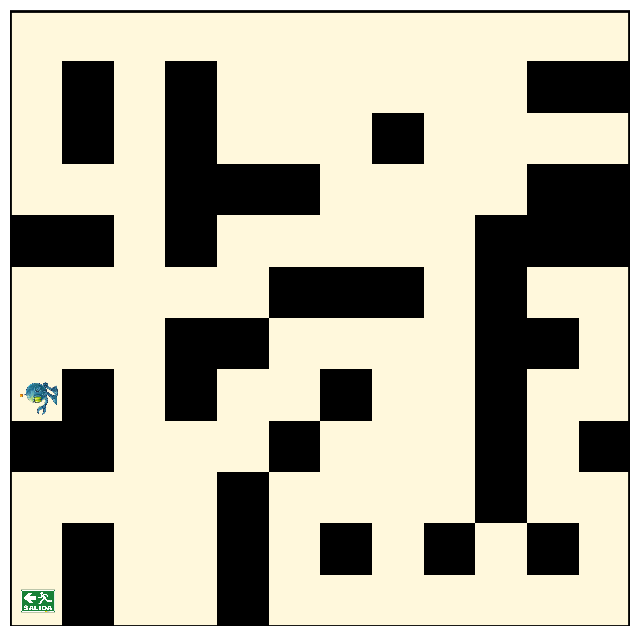

Exception: ¡Plan vacío! Revisar reglas en estado [True, True, True, False]

In [18]:
# Create environment
lab = Laberinto()
# Create agent
agent = RuleBased()
agent.reglas = reglas
# Create episode
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Reglas',\
        num_rounds=70)
# Visualize
episodio.renderize()

---

<a class="anchor" id="ej5"></a>**Ejercicio 5:** 

([Anterior ejercicio](#ej4)) ([Próximo ejercicio](#ej6))

¿Cree usted que es posible implementar un agente de respuesta simple para encontrar una salida al comenzar en las casillas $(6,3)$ y $(7,3)$? Justifique su respuesta.

---

## Pruebas de desempeño <a class="anchor" id="pruebas"></a>

([Volver al inicio](#inicio))

Vamos a evaluar el desempeño de un solo agente respecto a qué tan rápido encuentra la salida y a qué proporción de veces encuentra la salida. Luego compararemos el desempeño de dos agentes respecto a estas medidas.

**Evaluación de un agente**

En la clase `Episode` tenemos el método `simulate()`, el cual nos sirve para correr varios episodios. En cada episodio el agente inicia en un lugar distinto del laberinto. Esto se logra cambiando a `True` el parámetro de inicialización de la clase `Laberinto`.

Corra varias veces la siguiente celda para comprobar que el agente comienza en distintas casillas cada vez:

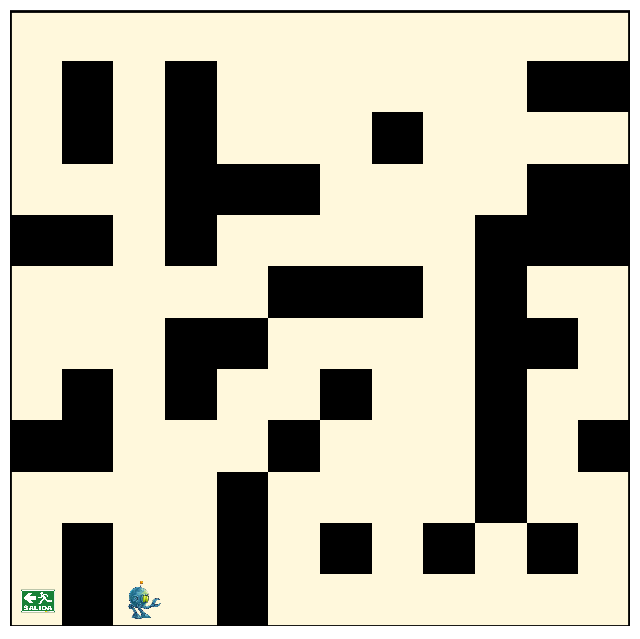

In [19]:
# Create environment
lab = Laberinto(aleatorio=True)
lab.render()

Ahora correremos la simulación. Nuestros parámetros serán un máximo de 300 rondas por cada episodio y correremos 100 episodios.

Observe que vamos a obtener un error del agente que tendremos que atender:

In [45]:
# Create environment
lab = Laberinto(aleatorio=True)
# Create agent
agent = RuleBased()
agent.reglas = reglas
# Create simulation
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Reglas',\
        num_rounds=300)
# Run simulation and save the data
df = episodio.simulate(num_episodes=100)
# Show first rows of dataframe
df.head()

Exception: ¡Plan vacío! Revisar reglas en estado [True, True, True, False]

<a class="anchor" id="ej6"></a>**Ejercicio 6:** 

([Anterior ejercicio](#ej5)) ([Próximo ejercicio](#ej7))

Incluya las reglas necesarias para que no ocurra ningún error del agente y así poder comprobar su desempeño.

In [20]:
# state[0]  =>  sensor forntal
# state[1]  =>  sensor izquierdo
# state[2]  =>  sensor derecho
# state[3]  =>  sensor trasero
reglas = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    'not state[0] and state[2]': ['adelante'],
    'state[0] and state[2] and not state[1]':['voltearIzquierda'],
    'not state[2]':['voltearDerecha','adelante'],
    'state[0] and state[1] and state[2] and not state[3]':['voltearIzquierda','voltearIzquierda','adelante']
    
    
}

---

In [21]:
# Create environment
lab = Laberinto(aleatorio=True)
# Create agent
agent = RuleBased()
agent.reglas = reglas
# Create simulation
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Reglas',\
        num_rounds=300)
# Run simulation and save the data
df = episodio.simulate(num_episodes=100)
# Show first rows of dataframe
df.head()

,episode,round,state,action,reward,done,model
0,0,0,"[True, True, False, False]",voltearDerecha,NaN,False,Reglas
1,0,1,"[False, True, False, True]",adelante,-1.0,False,Reglas
2,0,2,"[False, True, False, False]",voltearDerecha,-1.0,False,Reglas
3,0,3,"[False, False, False, True]",adelante,-1.0,False,Reglas
4,0,4,"[True, False, False, False]",voltearDerecha,-1.0,False,Reglas


Ahora podemos procesar los datos para obtener la recompensa total en cada uno de los 100 episodios:

In [22]:
df.groupby('episode').reward.sum().reset_index()

,episode,reward
0,0,-300.0
1,1,-300.0
2,2,-50.0
3,3,-23.0
4,4,-1.0
...,...,...
95,95,-300.0
96,96,-62.0
97,97,-300.0
98,98,-300.0


Podemos visualizar este resultado mediante la clase `Plot` del módulo `utils`:

Average sum of rewards:
 model
Reglas   -188.69
Name: reward, dtype: float64

Success percentage:
 model
Reglas    51.0
Name: done, dtype: float64


<AxesSubplot:xlabel='Sum of rewards', ylabel='Frequency'>

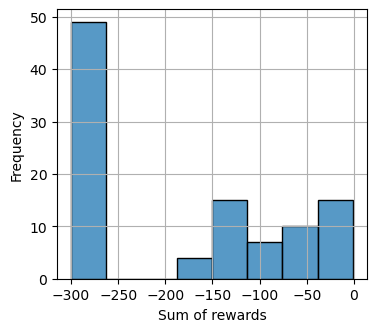

In [23]:
p = utils.Plot(df)
p.plot_histogram_rewards()

El histograma nos muestra una columna muy alta para valores de -300 en la variable de recompensa total (sum of rewards), y otras columnas más pequeñas para valores más cercanos a 0. Observe que la recompensa total es igual al número de pasos que da el agente en el laberinto. Los resultados numéricos que arroja la celda anterior incluyen el promedio de este número de pasos. Observe también que el porcentaje de episodios en los cuales el entorno finaliza antes de las 300 rondas se presenta como el porcentaje de éxito. 

<a class="anchor" id="ej7"></a>**Ejercicio 7:** 

([Anterior ejercicio](#ej6)) ([Próximo ejercicio](#ej8))

Repita los pasos anteriores para el agente dirigido por tabla. Comente los resultados del histograma.

In [24]:
# (sensor frontal, sensor izquierdo, sensor derecho, sensor trasero)
tabla = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    (False, True, True, True):['adelante'],
    (False, True, True, False):['adelante'],
    (False, False, True, True):['adelante'],
    (False, False, True, False):['adelante'],
    # Si el frente está bloqueado y el flanco derecho está
    # bloqueado y el flanco izquierdo , gira a la izquierda
    (True, False, True, True):['voltearIzquierda'],
    (True, False, True, False):['voltearIzquierda'],
    #si el flanco derecho no está bloqueado, voltear a la derecha y avanzar una casilla
    (True, True, False, True):['voltearDerecha','adelante'],
    (True, True, False, False):['voltearDerecha','adelante'],
    (True, False, False, True):['voltearDerecha','adelante'],
    (True, False, False, False):['voltearDerecha','adelante'],
    (False, True, False, True):['voltearDerecha','adelante'],
    (False, True, False, False):['voltearDerecha','adelante'],
    (False, False, False, True):['voltearDerecha','adelante'],
    (False, False, False, False):['voltearDerecha','adelante'],
    (True, True, True, False):['voltearIzquierda','voltearIzquierda','adelante']
}

In [25]:
# Create environment
lab = Laberinto(aleatorio=True)
# Create agent
agent = TableDriven()
agent.tabla = tabla
# Create simulation
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Reglas',\
        num_rounds=300)
# Run simulation and save the data
df = episodio.simulate(num_episodes=100)
# Show first rows of dataframe
df.head()

,episode,round,state,action,reward,done,model
0,0,0,"[True, False, True, False]",voltearIzquierda,NaN,False,Reglas
1,0,1,"[False, False, True, True]",adelante,-1.0,False,Reglas
2,0,2,"[False, True, True, False]",adelante,-1.0,False,Reglas
3,0,3,"[True, False, True, False]",voltearIzquierda,-1.0,False,Reglas
4,0,4,"[False, False, True, True]",adelante,-1.0,False,Reglas


Average sum of rewards:
 model
Reglas   -177.47
Name: reward, dtype: float64

Success percentage:
 model
Reglas    52.0
Name: done, dtype: float64


<AxesSubplot:xlabel='Sum of rewards', ylabel='Frequency'>

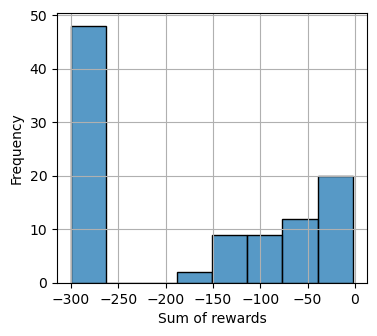

In [26]:
p = utils.Plot(df)
p.plot_histogram_rewards()

---

**Comparación de agentes**

Qué tan similares o distintos son ambos resultados. Para comparar el desempeño de ambos agentes es mejor tener las medidas una junto a la otra. Podemos usar la clase `Experiment` del módulo `utils` para hacer esta comparación. Corramos 500 episodios para tener una mejor aproximación al desempeño de cada agente:

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.46s/it]


Average sum of rewards:
 model
Reglas   -186.786
Tabla    -184.672
Name: reward, dtype: float64

Success percentage:
 model
Reglas    51.4
Tabla     51.8
Name: done, dtype: float64


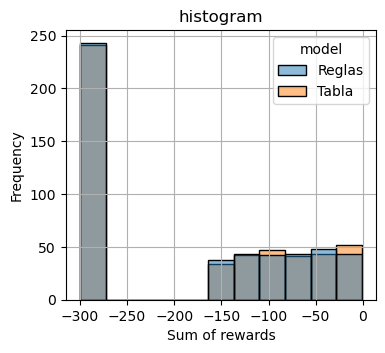

In [27]:
# Create environment
lab = Laberinto(aleatorio=True)
# Create list of agents
agent_table = TableDriven()
agent_table.tabla = tabla
agent_rules = RuleBased()
agent_rules.reglas = reglas
agents_list = [agent_table, agent_rules]
names = ['Tabla', 'Reglas']
# Create the experiment
exp = utils.Experiment(environment=lab, \
                num_rounds=300, \
                num_episodes=500, \
                num_simulations=1)
# Run the experiment
exp.run_experiment(agents=agents_list, \
                   names=names, \
                   measures=['histogram'])

En efecto el comportamiento de los agentes es muy similar. Necesitamos pruebas estadísticas para medir la fuerza de la evidencia que nos dan estos datos, pero esto es algo que no realizaremos aquí.

## Un agente basado en objetivos <a class="anchor" id="agenteOB"></a>

([Volver al inicio](#inicio))

Una manera de mejorar el desempeño del agente es dotarlo de la posibilidad de crear un mapa del laberinto a medida que lo va explorando. Usando sus percepciones, el agente incluirá la información de si en cierto lugar hay un muro o un pasadizo. Como no sabe su localización en el laberinto, su posición y dirección iniciales puede ser arbitraria.

Mediante este mapa, el agente sabrá qué partes ha visitado y cuales no. La idea es visitar sistemáticamente aquellos pasadizos que no haya visitado. Este procedimiento le da más chances de encontrar la salida y le asegura no quedarse en ciclos infinitos. 
Para llegar a un pasadizo que no haya visitado, el agente usa una planeación de rutas, como se describe a continuación.

**Planeación de rutas**

Planear una ruta desde la casilla actual hasta una casilla objetivo a la cual se desea ir es un problema muy similar a los que ya hemos encontrado en sesiones pasadas. Debemos definir un ambiente de tarea `Rejilla` y luego usar un algoritmo de búsqueda sobre este.

El ambiente se inicializa con una casilla `actual`, una `objetivo` y un `mapa`, el cual permitirá determinar cuáles casillas son un pasadizo. Los aspectos más importantes de la definición formal del ambiente de tarea son los siguientes:

* **acciones_aplicables**(`casilla`): Las casillas adyacentes a `casilla` que estén incluidas en el `mapa` como pasadizos.
* **heurística**(`casilla`): distancia euclidiana entre `casilla` y la casilla objetivo.

Al incluir la planeación de rutas en la arquitectura del agente estamos dos pasos más arriba en la jerarquía propuesta por Russell & Norvig. En efecto, estamos considerando una arquitectura de *agente basado en objetivos* (*goal-based agent*). La siguiente imagen presenta un esquema de este tipo de arquitectura:

<img src="./imagenes/goal-based.png" width="400">

La razón por la cual estamos dos pasos más arriba es porque también estamos incluyendo un modelo del mundo para planear nuestras acciones. El agente que hemos implementado crea un mapa, inicialmente vacío, y lo va completando a medida que va percibiendo el entorno. Esta característica ubica el agente como un agente basado en modelos (un paso arriba). Pero él también va considerando objetivos (llegar a un pasadizo no visitado) y para lograrlo realiza una planeación sobre el mapa. Este es un paso adicional en la jerarquía, ubicándose en la categoría de agente basado en objetivos. 

Podemos ver el funcionamiento del agente mediante el siguiente código:

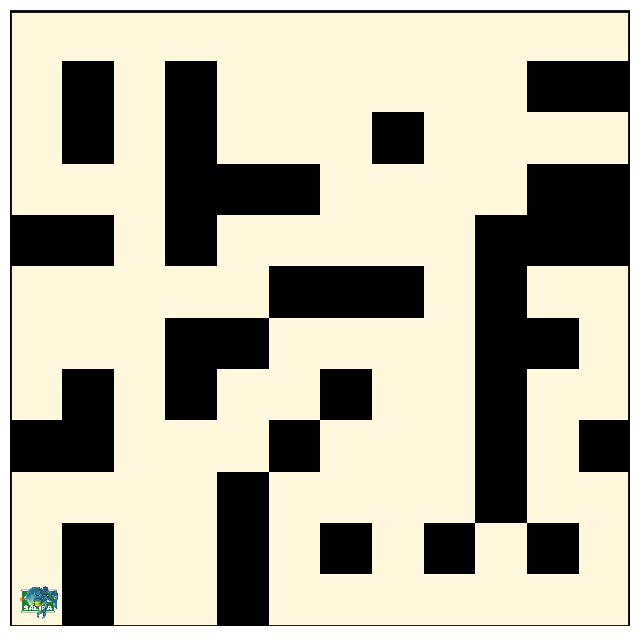

In [28]:
# Create environment
lab = Laberinto()
# Create agent
agent = GoalBased()
# Create episode
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Objetivos',\
        num_rounds=70,\
        id=0)
# Visualize
episodio.renderize() 

<a class="anchor" id="ej8"></a>**Ejercicio 8:** 

([Anterior ejercicio](#ej7)) ([Próximo ejercicio](#ej9))

Determine si este agente es capaz de resolver el laberinto desde las posiciones iniciales (6,3) y (7,3). 

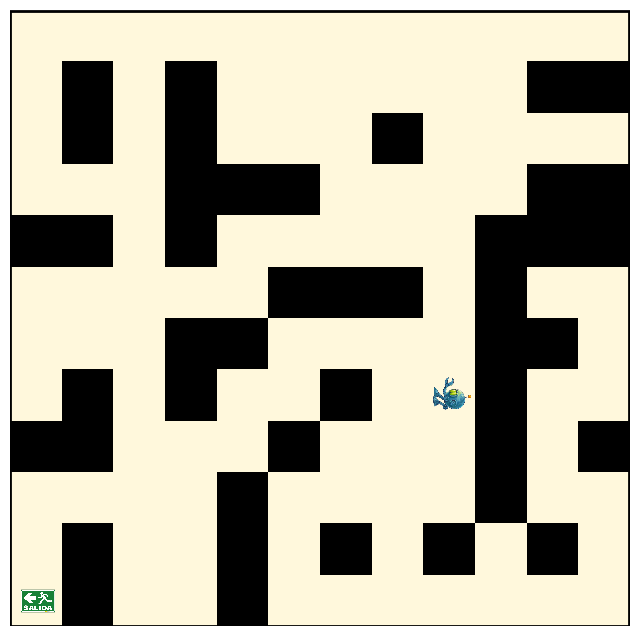

In [29]:
# Create environment
lab = Laberinto(pos_inicial=(6,3))
# Create agent
agent = GoalBased()
# Create episode
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Tabla',\
        num_rounds=70)
# Visualize
episodio.renderize()

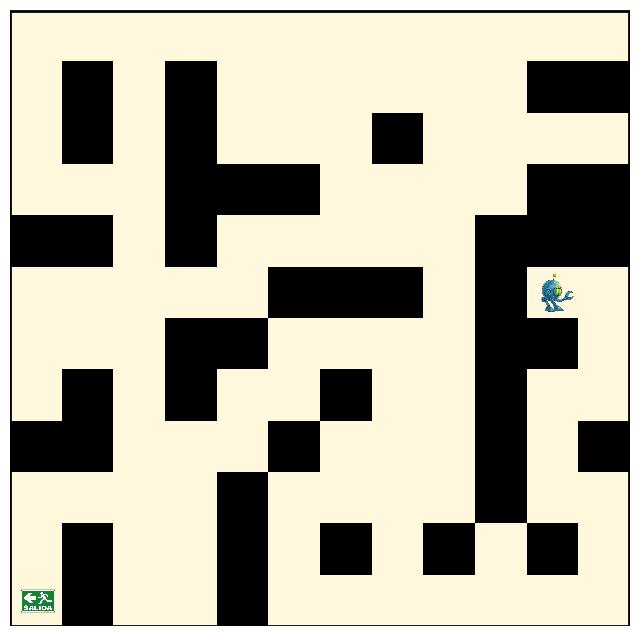

KeyboardInterrupt: 

In [30]:
lab = Laberinto(pos_inicial=(7,3))
# Create agent
agent = GoalBased()
# Create episode
episodio = utils.Episode(environment=lab,\
        agent=agent,\
        model_name='Tabla',\
        num_rounds=70)
# Visualize
episodio.renderize()

el agente basado en objetivos puede resolver ambos casos.

---

<a class="anchor" id="ej9"></a>**Ejercicio 9:** 

([Anterior ejercicio](#ej8))

Compare el desempeño de los tres agentes en un solo histograma. Use un máximo de 300 rondas y corra 500 episodios para cada agente.

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.36s/it]


Average sum of rewards:
 model
Reglas   -186.906
Tabla    -177.600
goals    -109.052
Name: reward, dtype: float64

Success percentage:
 model
Reglas     50.8
Tabla      56.0
goals     100.0
Name: done, dtype: float64


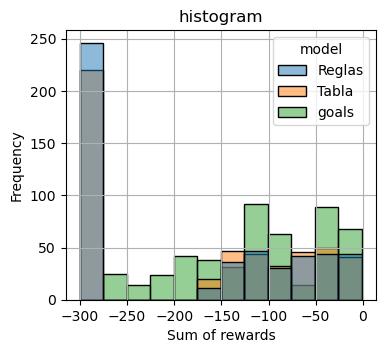

In [31]:
# Create environment
lab = Laberinto(aleatorio=True)
# Create list of agents
agent_table = TableDriven()
agent_table.tabla = tabla
agent_rules = RuleBased()
agent_rules.reglas = reglas
agent_goals=GoalBased()
agents_list = [agent_table, agent_rules,agent_goals]
names = ['Tabla', 'Reglas','goals']
# Create the experiment
exp = utils.Experiment(environment=lab, \
                num_rounds=300, \
                num_episodes=500, \
                num_simulations=1)
# Run the experiment
exp.run_experiment(agents=agents_list, \
                   names=names, \
                   measures=['histogram'])

---

## En este notebook usted aprendió

* Los detalles de la implementación de programas de agente dirigido por tabla, de reflejo simple y basado en objetivos.
* Realizar pruebas de desempeño a los programas.
